In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/iOS개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
1,iOS APP 서비스의 분석 및 개발 테스트 및 지속적인 최적화를 담당합니다 UX...,Swift로 개발 가능하신 분 iOS 앱 개발과 유지보수 배포 경험이 1년 이상 ...
2,광고 SDK 개발 및 유지보수 인하우스 서비스 iOS 개발,컴퓨터공학 전산학 수학 등 직무 관련 전공자 유관 경력 3년 이상 1차 면접에서 ...
3,React Native 기반 앱 퍼블리싱 및 프론트엔드 작업 javascript ...,React Native 앱 개발 프로젝트 최소 3건 이상 애니메이션 적용 경험 파...
4,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...
...,...,...
86,OnDevice 기반 마이데이터 거래 플랫폼 및 어플리케이션 개발Android 자...,Android 3년 이상 Android 개발 경험을 보유한 자기 주도적인 성향의 개...
87,비사이드코리아의 어플리케이션 개발 및 배포 테스트 작성 및 여러 개발자들이 협업하...,컴퓨터 공학 관련 학위를 소지하거나 Flutter 개발 경험이 있으신 분 탄탄한 ...
88,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
89,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
1,Swift로 개발 가능하신 분 iOS 앱 개발과 유지보수 배포 경험이 1년 이상 ...
2,컴퓨터공학 전산학 수학 등 직무 관련 전공자 유관 경력 3년 이상 1차 면접에서 ...
3,React Native 앱 개발 프로젝트 최소 3건 이상 애니메이션 적용 경험 파...
4,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...
...,...
86,Android 3년 이상 Android 개발 경험을 보유한 자기 주도적인 성향의 개...
87,컴퓨터 공학 관련 학위를 소지하거나 Flutter 개발 경험이 있으신 분 탄탄한 ...
88,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
89,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/iOS개발(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Cloud front S3 등 프로젝트 PLPM 등 수행 및 업무 시스템 구축 경험 테크니컬 분석설계 역량 AndroidIOS 개발 경험 네이티브 플러터 리액트 네이티브 등 모바일 크로스 플랫폼 관련 경험 서브 능력 Python JS RDB 개발 경험 Flask Django Vuejs MariaDBMySQL 사용 혹은 관련 겅험 관련 경력자\n Swift로 개발 가능하신 분 iOS 앱 개발과 유지보수 배포 경험이 1년 이상 진행 경험 있으신 분 네이티브 지원 기능에 대한 이해가 높으신 분 개발 목표에 대한 책임감이 있으신 분 주도적으로 문제를 해결하고 책임감 있으신 분 코드 퀄리티에 지속적으로 고민하시는 분 새로운 기술에 대한 관심과 습득사용에 능동적인 분 코드리뷰 경험 있으신 분 Modular Architecture 대한 이해 MVVM 사용하여 프로젝트 진행 경험 SPM 대한 이해 CICD 경험 단위 테스트 경험 컴퓨터 공학 전공\n 컴퓨터공학 전산학 수학 등 직무 관련 전공자 유관 경력 3년 이상 1차 면접에서 포트폴리오 필수 제출 광고 솔루션 경험  초기 앱 서비스 개발 경험\n React Native 앱 개발 프로젝트 최소 3건 이상 애니메이션 적용 경험 파이어베이스 연동 경험 Android iOS 복수 개발 경험 카메라 마이크 블루투스 및 하드웨어 제어 경험\n JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 빅데이터AI 분야 업계 종사 경력 앱 및 웹 개발 경력\n iOS 개발경험이 4년 이상이거나 그에 준하는 실력을 보유하고 있으셔야 합니다 Swift 언어에 대한 높은 이해도를 기반으로 제품을 출시한 경험이 있으셔야 합니다 반응형 프로그래밍 eg RxSwift Combine의 경험이 필요합니다 앱 아키텍처에 대해 고민하고 적용했던 경험이 있으셔야 합니다      MVVM MVP 등의 디자인패턴을 적용해본 경험    

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '개발',
 '및',
 '운영',
 '경험',
 '등',
 '프로젝트',
 '등',
 '수행',
 '및',
 '업무',
 '시스템',
 '구축',
 '경험',
 '테크니컬',
 '분석',
 '설계',
 '역량',
 '개발',
 '경험',
 '네이티',
 '브',
 '플러터',
 '리액트',
 '네이티',
 '브',
 '등',
 '모바일',
 '크로스',
 '플랫폼',
 '관련',
 '경험',
 '서브',
 '능력',
 '개발',
 '경험',
 '사용',
 '관련',
 '겅험',
 '관련',
 '경력',
 '로',
 '개발',
 '분',
 '앱',
 '개발',
 '유지',
 '보수',
 '배포',
 '경험',
 '이상',
 '진행',
 '경험',
 '분',
 '네이티',
 '브',
 '지원',
 '기능',
 '대한',
 '이해',
 '분',
 '개발',
 '목표',
 '대한',
 '책임감',
 '분',
 '주도',
 '문제',
 '해결',
 '책임감',
 '분',
 '코드',
 '퀄리티',
 '지속',
 '고민',
 '분',
 '기술',
 '대한',
 '관심',
 '습득',
 '사용',
 '능동',
 '분',
 '코드',
 '리뷰',
 '경험',
 '분',
 '대한',
 '이해',
 '사용',
 '프로젝트',
 '진행',
 '경험',
 '대한',
 '이해',
 '경험',
 '단위',
 '테스트',
 '경험',
 '컴퓨터',
 '공학',
 '전공',
 '컴퓨터공학',
 '전산학',
 '수학',
 '등',
 '직무',
 '관련',
 '전공자',
 '유관',
 '경력',
 '이상',
 '차',
 '면접',
 '포트폴리오',
 '필수',
 '제출',
 '광고',
 '솔루션',
 '경험',
 '초기',
 '앱',
 '서비스',
 '개발',
 '경험',
 '앱',
 '개발',
 '프로젝트',
 '최소',
 '건',
 '이상',
 '애니메이션',
 '적용',
 '경험',
 '파이어',
 '베이스',
 '연동',


In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

4617
595


FreqDist({'경험': 406, '분': 402, '개발': 295, '및': 148, '대한': 120, '이상': 78, '등': 77, '사용': 70, '경력': 68, '이해': 66, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '운영',
 '프로젝트',
 '수행',
 '시스템',
 '구축',
 '테크니컬',
 '분석',
 '설계',
 '역량',
 '네이티',
 '브',
 '플러터',
 '리액트',
 '네이티',
 '브',
 '모바일',
 '크로스',
 '플랫폼',
 '서브',
 '겅험',
 '로',
 '앱',
 '유지',
 '보수',
 '배포',
 '진행',
 '네이티',
 '브',
 '지원',
 '기능',
 '목표',
 '책임감',
 '주도',
 '문제',
 '책임감',
 '코드',
 '퀄리티',
 '지속',
 '고민',
 '기술',
 '습득',
 '능동',
 '코드',
 '리뷰',
 '프로젝트',
 '진행',
 '단위',
 '테스트',
 '컴퓨터',
 '공학',
 '전공',
 '컴퓨터공학',
 '전산학',
 '수학',
 '직무',
 '전공자',
 '유관',
 '차',
 '면접',
 '포트폴리오',
 '제출',
 '광고',
 '솔루션',
 '초기',
 '앱',
 '서비스',
 '앱',
 '프로젝트',
 '최소',
 '건',
 '애니메이션',
 '적용',
 '파이어',
 '베이스',
 '연동',
 '복수',
 '카메라',
 '마이크',
 '블루투스',
 '하드웨어',
 '제어',
 '안드로이드',
 '앱',
 '웹',
 '프로토콜',
 '설계',
 '분야',
 '별',
 '능통',
 '핀',
 '테크',
 '빅데이터',
 '분야',
 '업계',
 '종사',
 '앱',
 '웹',
 '거나',
 '그',
 '준',
 '실력',
 '언어',
 '제품',
 '출시',
 '반응',
 '프로그래밍',
 '의',
 '앱',
 '아키텍처',
 '대해',
 '고민',
 '적용',
 '디자인',
 '패턴',
 '적용',
 '공통',
 '코드',
 '모듈',
 '작성',
 '도구',
 '이용',
 '문제',
 '분석',
 '제공',
 '이용',
 '이슈',
 '프로젝트',
 '외부',
 '라이브러리',
 '조건',
 '선택',
 '검증',
 '적용',
 '테',


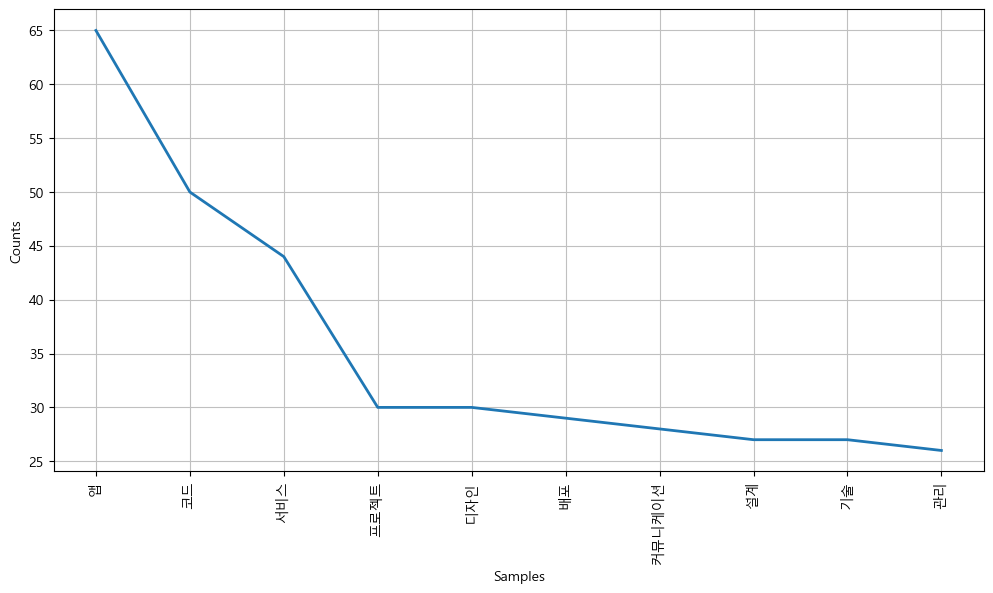

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

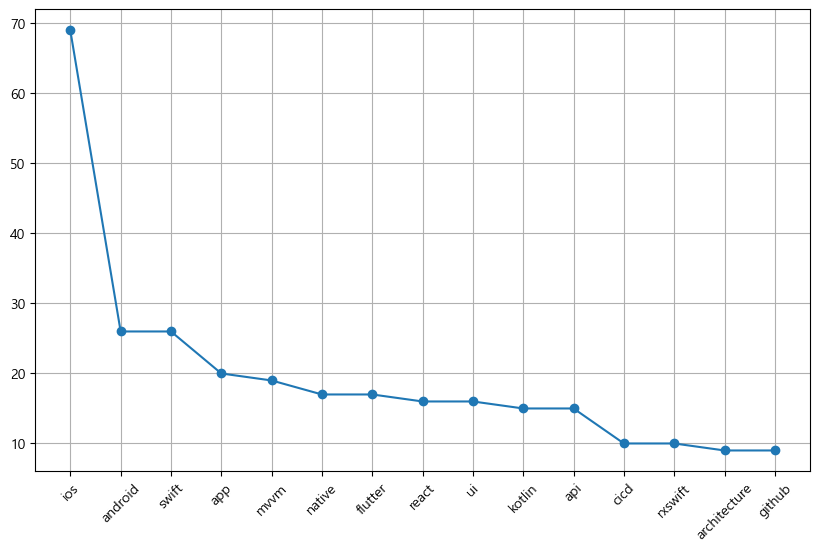

In [13]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)